In [9]:
import proplot as pplt
import numpy as np
from ruamel.yaml import YAML
import xarray as xr

from pathlib import Path

In [10]:
plotting_dir = Path("plots/ensemble/ec-earth-3")
plotting_dir.mkdir(exist_ok=True, parents=True)
ensemble_directory = Path("PAPA/ensemble_output")

In [11]:
schwarz_directories = []
yaml = YAML(typ="unsafe", pure=True)
for date_dir in ensemble_directory.glob("*"):
    if date_dir.is_dir():
        schwarz_directories.append(date_dir / "schwarz")
experiments = []
non_converged_counter = 0
for schwarz_dir in schwarz_directories:
    with open(schwarz_dir / "setup_dict.yaml") as yaml_file:
        experiment = yaml.load(yaml_file)
        converged = experiment.iterate_converged["inf-norm"]
        if converged:
            experiments.append(experiment)
        else:
            non_converged_counter += 1

iterations = np.array([experiment.iteration for experiment in experiments])
# start_dates = np.array([schwarz_dict["run_start_date"] for schwarz_dict in schwarz_dicts])
iterations = xr.DataArray(iterations, name="iterations")

In [12]:
print(f"Not converged: {non_converged_counter}")

Not converged: 3


In [13]:
iteration_count = iterations.groupby(iterations).count()
iteration_count.name = "Iteration Count"

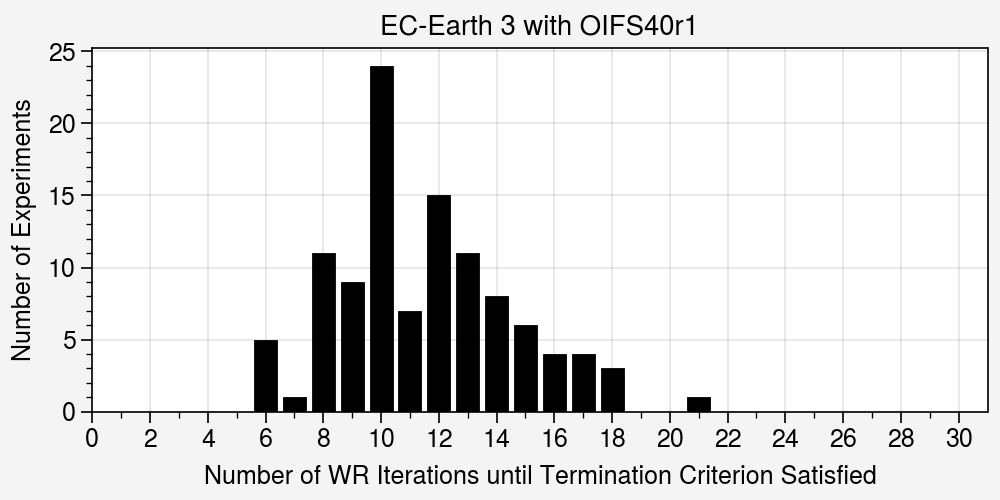

In [14]:
fig, ax = pplt.subplots(width="40em", height="20em")
ax.bar(iteration_count, absolute_width=True, color="k")
ax.format(
    xlabel="Number of WR Iterations until Termination Criterion Satisfied",
    ylabel="Number of Experiments",
    xlim=[0, 31],
    xticks=np.arange(0, 31, 2),
    xtickminor=True,
    xminorticks=np.arange(0, 31),
    title="EC-Earth 3 with OIFS40r1"
)
fig.savefig(plotting_dir / "swr_iteration_count.pdf")

In [15]:
iterations.mean()

<xarray.DataArray 'iterations' ()> Size: 8B
array(11.51376147)

In [16]:
iterations.median()

<xarray.DataArray 'iterations' ()> Size: 8B
array(11.)